In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


In [2]:
# Variables:
# Courses (each course is a variable).

# Domains:
# Combinations of respective timeslots and rooms.

# Constraints:
# Assign students to courses based on the enrollment table.
# Avoid overlapping schedules for students and professors.
# Match room capacities with course sizes.
# Assign suitable rooms based on course type (e.g., classroom/lecture).
# Schedule courses per timeslot, avoiding time conflicts.

In [3]:
# Reading the data and visualizing for the initial insights 

In [4]:
# Define the path to your large CSV file
file_path_courses = "C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Courses.csv"

# Define the chunk size (number of rows per chunk)
chunk_size = 10000  # You can adjust this based on your system's memory

# Initialize an empty list to store chunks
chunks = []

# Read the data in chunks
for chunk in pd.read_csv(file_path_courses, chunksize=chunk_size):
    # Drop unnecessary columns with all NaN values
    chunk = chunk.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN (optional, if applicable)
    chunk = chunk.dropna(how='all')

    # Append the cleaned chunk to the list
    chunks.append(chunk)

# Combine the cleaned chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

# Reset the index of the final DataFrame
data.reset_index(drop=True, inplace=True)

# Preview the final combined data
print(data.head())


  course_id course_name  num_students room_type_required
0        C1     Math101            20          Classroom
1        C2       CS101            35       Lecture Hall
2        C3       AI102            18          Classroom
3        C4       ML202            44       Lecture Hall
4        C5  DataSci301            48       Lecture Hall


In [5]:
# Check the data types of each column
print(data.dtypes)


course_id             object
course_name           object
num_students           int64
room_type_required    object
dtype: object


In [6]:
# Summary statistics for numerical columns
print(data.describe())


       num_students
count     15.000000
mean      28.266667
std       11.385873
min       10.000000
25%       19.000000
50%       27.000000
75%       37.500000
max       48.000000


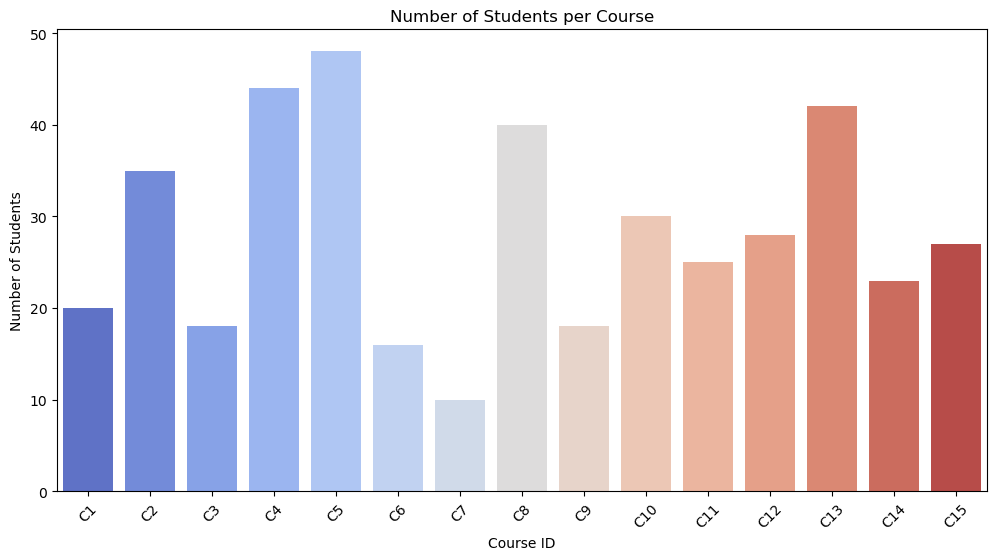

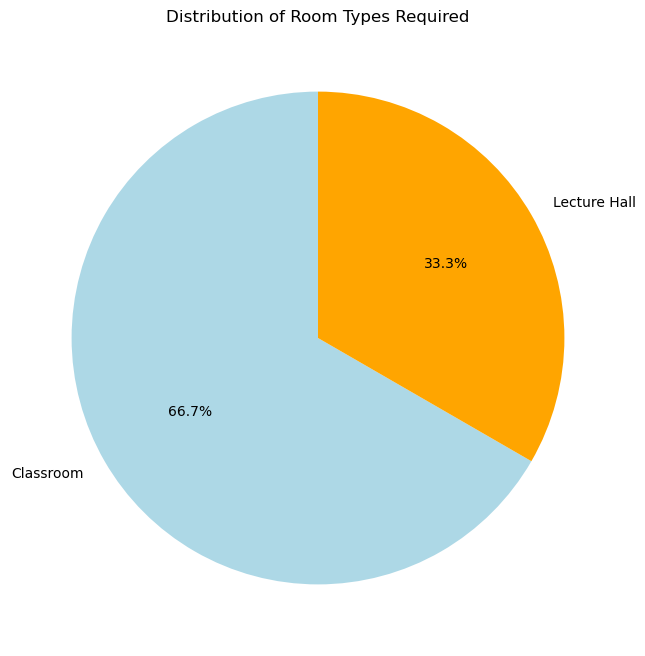

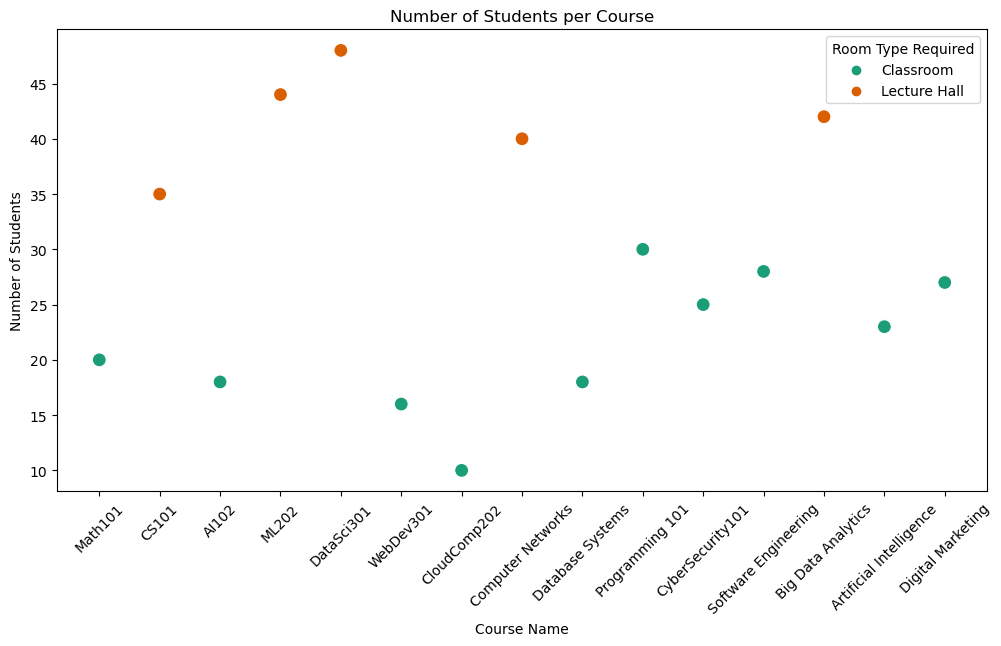

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Courses.csv")

# 1. Bar Chart: Number of Students per Course
plt.figure(figsize=(12, 6))
sns.barplot(x='course_id', y='num_students', data=df, palette='coolwarm')
plt.title('Number of Students per Course')
plt.xlabel('Course ID')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# 3. Pie Chart: Distribution of Room Types Required
room_type_counts = df['room_type_required'].value_counts()
plt.figure(figsize=(8, 8))
room_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Distribution of Room Types Required')
plt.ylabel('')
plt.show()

# 5. Scatter Plot: Number of Students per Course
plt.figure(figsize=(12, 6))
sns.scatterplot(x='course_name', y='num_students', hue='room_type_required', data=df, palette='Dark2', s=100)
plt.title('Number of Students per Course')
plt.xlabel('Course Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Room Type Required')
plt.show()

In [8]:
# Define the path to your large CSV file
file_path_professors = "C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Professors.csv"

# Define the chunk size (number of rows per chunk)
chunk_size = 10000  # You can adjust this based on your system's memory

# Initialize an empty list to store chunks
chunks = []

# Read the data in chunks
for chunk in pd.read_csv(file_path_professors, chunksize=chunk_size):
    # Drop unnecessary columns with all NaN values
    chunk = chunk.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN (optional, if applicable)
    chunk = chunk.dropna(how='all')

    # Append the cleaned chunk to the list
    chunks.append(chunk)

# Combine the cleaned chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

# Reset the index of the final DataFrame
data.reset_index(drop=True, inplace=True)

# Preview the final combined data
print(data.head())


  Instructor ID First Name Last Name  \
0          P001       John       Doe   
1          P002       Jane     Smith   
2          P003    Michael     Brown   
3          P004      Emily   Johnson   
4          P005      David     Davis   

                                    Courses Assigned  
0                    Math101, AI102, Programming 101  
1   CS101, Database Systems, Artificial Intelligence  
2  DataSci301, Networking Essentials, Digital Mar...  
3             ML202, Data Mining, Big Data Analytics  
4                 CloudComp202, Software Engineering  


In [9]:
# Check the data types of each column
print(data.dtypes)


Instructor ID       object
First Name          object
Last Name           object
Courses Assigned    object
dtype: object


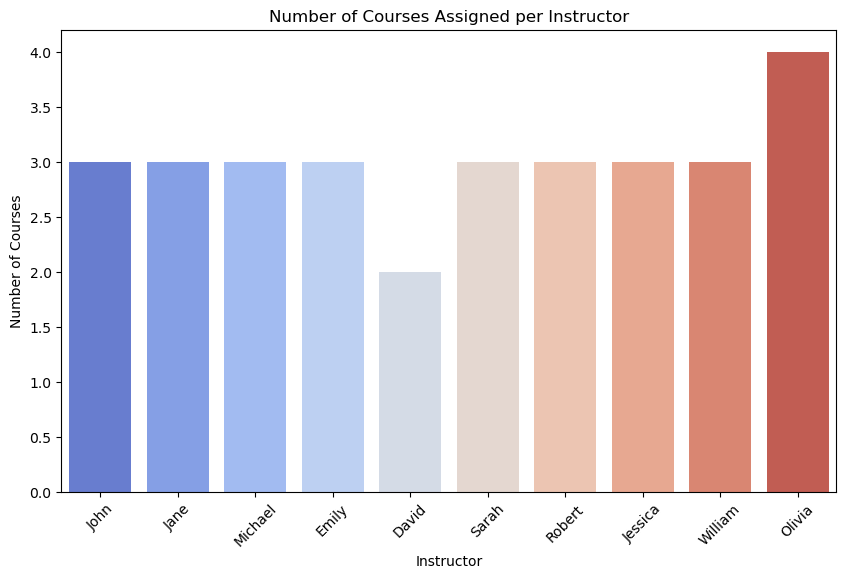

In [10]:
# Read the dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Professors.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Check for missing data in 'Courses Assigned' column
df['Courses Assigned'] = df['Courses Assigned'].fillna('')

# Split the courses into a list for analysis, strip extra spaces around course names
df['Course List'] = df['Courses Assigned'].apply(lambda x: [course.strip() for course in x.split(', ') if course])

# Flatten the list of courses for visualizations
course_list = [course for sublist in df['Course List'] for course in sublist]

# 1. Bar Chart: Number of Courses Assigned per Instructor
plt.figure(figsize=(10, 6))
df['Num Courses'] = df['Course List'].apply(len)
sns.barplot(x='First Name', y='Num Courses', data=df, palette='coolwarm')
plt.title('Number of Courses Assigned per Instructor')
plt.xlabel('Instructor')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Define the path to your large CSV file
file_path_rooms = "C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Rooms.csv"

# Define the chunk size (number of rows per chunk)
chunk_size = 10000  # You can adjust this based on your system's memory

# Initialize an empty list to store chunks
chunks = []

# Read the data in chunks
for chunk in pd.read_csv(file_path_rooms, chunksize=chunk_size):
    # Drop unnecessary columns with all NaN values
    chunk = chunk.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN (optional, if applicable)
    chunk = chunk.dropna(how='all')

    # Append the cleaned chunk to the list
    chunks.append(chunk)

# Combine the cleaned chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

# Reset the index of the final DataFrame
data.reset_index(drop=True, inplace=True)

# Preview the final combined data
print(data.head())


  room_id  room_number  capacity     room_type  Room Type Encoded
0      R1          101        30     Classroom                  0
1      R2          102        25     Classroom                  0
2      R3          201        40  Lecture Hall                  1
3      R4          202        50  Lecture Hall                  1
4      R5          203        20     Classroom                  0


In [12]:
# Check the data types of each column
print(data.dtypes)


room_id              object
room_number           int64
capacity              int64
room_type            object
Room Type Encoded     int64
dtype: object


In [13]:
# Summary statistics for numerical columns
print(data.describe())


       room_number   capacity  Room Type Encoded
count    10.000000  10.000000          10.000000
mean    222.300000  32.500000           0.300000
std      79.226889   8.897565           0.483046
min     101.000000  20.000000           0.000000
25%     201.250000  26.250000           0.000000
50%     203.500000  30.000000           0.000000
75%     301.750000  38.750000           0.750000
max     304.000000  50.000000           1.000000


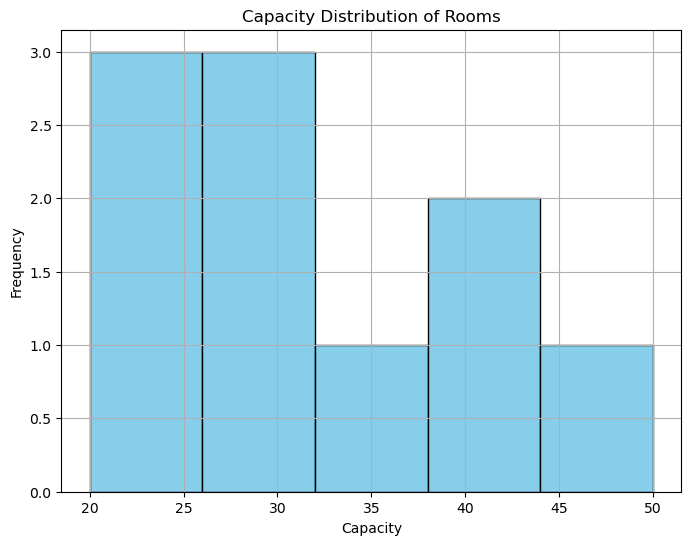

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Rooms.csv")

# Plotting the histogram for the 'capacity' column
plt.figure(figsize=(8, 6))
plt.hist(df['capacity'], bins=5, color='skyblue', edgecolor='black')
plt.title('Capacity Distribution of Rooms')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


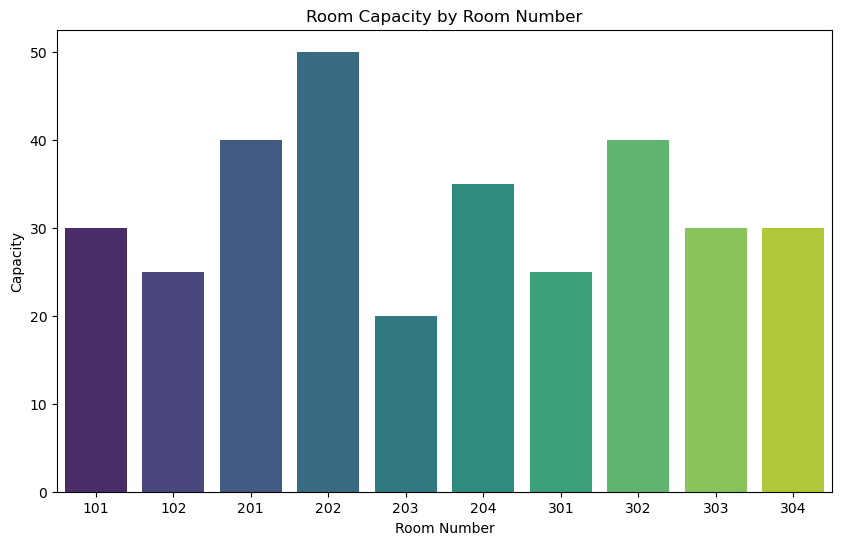

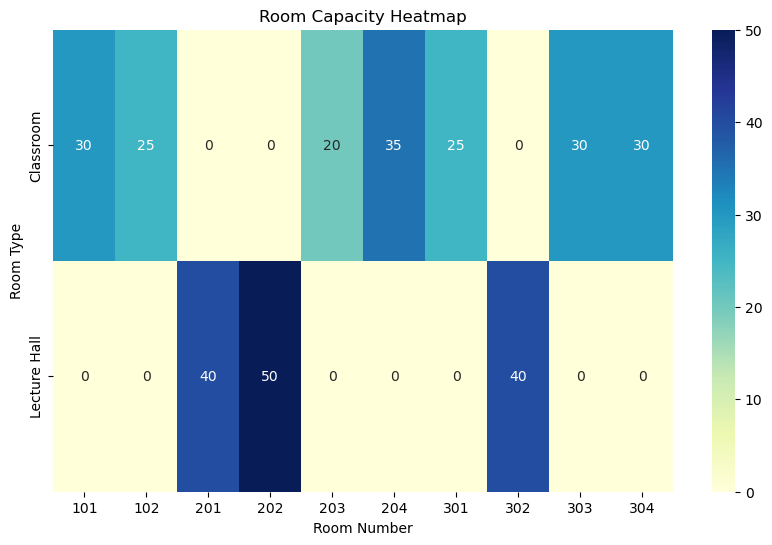

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Rooms.csv")

# 1. Bar Chart: Room Capacity by Room Number
plt.figure(figsize=(10, 6))
sns.barplot(x='room_number', y='capacity', data=df, palette='viridis')
plt.title('Room Capacity by Room Number')
plt.xlabel('Room Number')
plt.ylabel('Capacity')
plt.show()

# 3. Heatmap: Room Capacity
plt.figure(figsize=(10, 6))
heatmap_data = df.pivot_table(values='capacity', index='room_type', columns='room_number', fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Room Capacity Heatmap')
plt.xlabel('Room Number')
plt.ylabel('Room Type')
plt.show()

In [16]:
# Define the path to your large CSV file
file_path_students = "C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Students.csv"

# Define the chunk size (number of rows per chunk)
chunk_size = 10000  # You can adjust this based on your system's memory

# Initialize an empty list to store chunks
chunks = []

# Read the data in chunks
for chunk in pd.read_csv(file_path_students, chunksize=chunk_size):
    # Drop unnecessary columns with all NaN values
    chunk = chunk.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN (optional, if applicable)
    chunk = chunk.dropna(how='all')

    # Append the cleaned chunk to the list
    chunks.append(chunk)

# Combine the cleaned chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

# Reset the index of the final DataFrame
data.reset_index(drop=True, inplace=True)

# Preview the final combined data
print(data.head())


  student_id name & surname                                   enrolled_courses
0         S1      Amy White  C13 (CyberSecurity101), C18 (Big Data Analytic...
1         S2      Bob Green  C1 (Math101), C16 (Software Engineering), C9 (...
2         S3   Charlie Blue  C13 (CyberSecurity101), C12 (Programming 101),...
3         S4   Diana Yellow  C2 (CS101), C18 (Artificial Intelligence), C16...
4         S5        Eva Red  C17 (Big Data Analytics), C2 (CS101), C7 (WebD...


In [17]:
# Check the data types of each column
print(data.dtypes)


student_id          object
name & surname      object
enrolled_courses    object
dtype: object


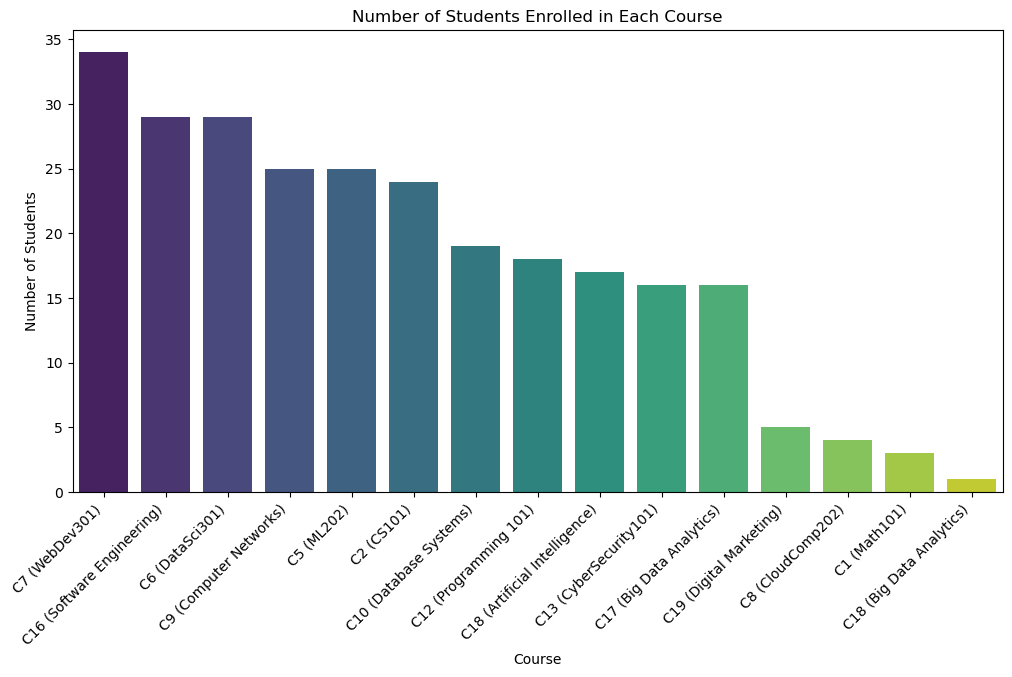

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Students.csv")

# Clean column names by stripping any extra spaces
df.columns = df.columns.str.strip()

# Split the enrolled courses into a list for analysis
df['Enrolled Courses List'] = df['enrolled_courses'].apply(lambda x: [course.strip() for course in x.split(', ')])

# Flatten the list of enrolled courses for visualization
course_list = [course for sublist in df['Enrolled Courses List'] for course in sublist]

# Create a DataFrame with the course list
course_df = pd.DataFrame({'Course': course_list})

# Count the number of students enrolled in each course
course_counts = course_df['Course'].value_counts()

# Plot the Bar Chart: Number of Students Enrolled in Each Course
plt.figure(figsize=(12, 6))
sns.barplot(x=course_counts.index, y=course_counts.values, palette='viridis')  # Use course_counts here
plt.title('Number of Students Enrolled in Each Course')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.show()


In [19]:
# Define the path to your large CSV file
file_path_timeslots = "C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Timeslots.csv"

# Define the chunk size (number of rows per chunk)
chunk_size = 10000  # You can adjust this based on your system's memory

# Initialize an empty list to store chunks
chunks = []

# Read the data in chunks
for chunk in pd.read_csv(file_path_timeslots, chunksize=chunk_size):
    # Drop unnecessary columns with all NaN values
    chunk = chunk.dropna(axis=1, how='all')
    
    # Drop rows where all values are NaN (optional, if applicable)
    chunk = chunk.dropna(how='all')

    # Append the cleaned chunk to the list
    chunks.append(chunk)

# Combine the cleaned chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

# Reset the index of the final DataFrame
data.reset_index(drop=True, inplace=True)

# Preview the final combined data
print(data.head())


  timeslot_id      day start_time  end_time  Duration in Minutes
0          T1   Monday    9:00 AM  11:00 AM                  120
1          T2   Monday   11:30 AM   1:30 PM                  120
2          T3   Monday    2:00 PM   4:00 PM                  120
3          T4  Tuesday   10:00 AM  12:00 PM                  120
4          T5  Tuesday    1:00 PM   3:00 PM                  120


In [20]:
# Check the data types of each column
print(data.dtypes)


timeslot_id            object
day                    object
start_time             object
end_time               object
Duration in Minutes     int64
dtype: object


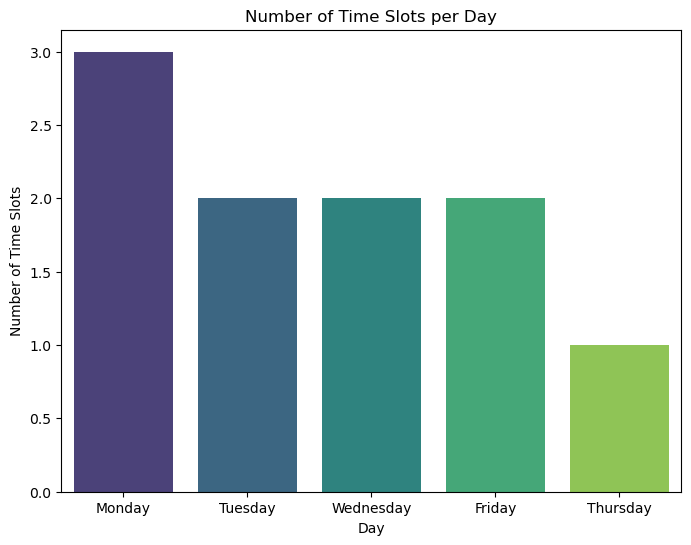

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\HP\\OneDrive - ADA University\\Documents\\ADA University\\!Fall 2024\\Artificial Intelligence 10111\\ProjectDATA\\csv\\Timeslots.csv")

# Count the number of timeslots per day
timeslot_counts = df['day'].value_counts()

# Create a bar plot for the number of timeslots per day
plt.figure(figsize=(8, 6))
sns.barplot(x=timeslot_counts.index, y=timeslot_counts.values, palette='viridis')
plt.title('Number of Time Slots per Day')
plt.xlabel('Day')
plt.ylabel('Number of Time Slots')
plt.show()


In [22]:
# SOME PREPROCESSING STEPS FOR CLEANING THE INITIAL DATA

In [23]:
courses = pd.read_csv(file_path_courses)
rooms = pd.read_csv(file_path_rooms)
time_slots = pd.read_csv(file_path_timeslots)
professors = pd.read_csv(file_path_professors)
students = pd.read_csv(file_path_students)

In [24]:
# Fill missing values
courses['num_students'] = courses['num_students'].fillna(courses['num_students'].median())
rooms['capacity'] = rooms['capacity'].fillna(rooms['capacity'].median())
time_slots['timeslot_id'] = time_slots['timeslot_id'].fillna(method='ffill')


In [25]:
# Remove duplicates in all datasets
time_slots.drop_duplicates(inplace=True)
students.drop_duplicates(inplace=True)
rooms.drop_duplicates(inplace=True)
professors.drop_duplicates(inplace=True)
courses.drop_duplicates(inplace=True)


In [26]:
# Convert start_time and end_time to datetime format
time_slots['start_time'] = pd.to_datetime(time_slots['start_time'], format='%I:%M %p').dt.strftime('%I:%M %p')
time_slots['end_time'] = pd.to_datetime(time_slots['end_time'], format='%I:%M %p').dt.strftime('%I:%M %p')

# Ensure logical time order
time_slots = time_slots[time_slots['start_time'] < time_slots['end_time']]

# Optionally calculate duration in minutes (if needed)
time_slots['duration'] = pd.to_datetime(time_slots['end_time'], format='%I:%M %p') - pd.to_datetime(time_slots['start_time'], format='%I:%M %p')
time_slots['duration'] = time_slots['duration'].dt.total_seconds() / 60


In [27]:
# Label encoding for room types
label_encoder = LabelEncoder()

rooms['room_type_encoded'] = label_encoder.fit_transform(rooms['room_type'])

In [28]:
# Ensure correct data types
rooms['capacity'] = rooms['capacity'].astype(int)
courses['num_students'] = courses['num_students'].astype(int)
time_slots['day'] = time_slots['day'].astype('category')


In [29]:
# Create a dictionary of professors and their qualified courses
professor_courses = professors.set_index('Instructor ID')['Courses Assigned'].to_dict()

# Create a dictionary of rooms and their capacities and types
room_info = rooms.set_index('room_id')[['capacity', 'room_type']].to_dict('index')

# Create a list of time slots available
time_slots_list = time_slots[['timeslot_id', 'day', 'start_time', 'end_time']]

# Check student enrollments
students_courses = students.groupby('student_id')['enrolled_courses'].apply(list).to_dict()

print(professor_courses)
print(room_info)
print(time_slots_list)


{'P001': 'Math101, AI102, Programming 101', 'P002': 'CS101, Database Systems, Artificial Intelligence', 'P003': 'DataSci301, Networking Essentials, Digital Marketing', 'P004': 'ML202, Data Mining, Big Data Analytics', 'P005': 'CloudComp202, Software Engineering', 'P006': 'Stats103, CyberSecurity101, Data Mining', 'P007': 'Computer Networks, DataSci301, AI101', 'P008': 'WebDev301, Digital Marketing, Artificial Intelligence', 'P009': 'Programming 101, Networking Essentials, Big Data Analytics', 'P010': 'CyberSecurity101, AI102, Software Engineering, Computer Networks'}
{'R1': {'capacity': 30, 'room_type': 'Classroom'}, 'R2': {'capacity': 25, 'room_type': 'Classroom'}, 'R3': {'capacity': 40, 'room_type': 'Lecture Hall'}, 'R4': {'capacity': 50, 'room_type': 'Lecture Hall'}, 'R5': {'capacity': 20, 'room_type': 'Classroom'}, 'R6': {'capacity': 35, 'room_type': 'Classroom'}, 'R7': {'capacity': 25, 'room_type': 'Classroom'}, 'R8': {'capacity': 40, 'room_type': 'Lecture Hall'}, 'R9': {'capacity

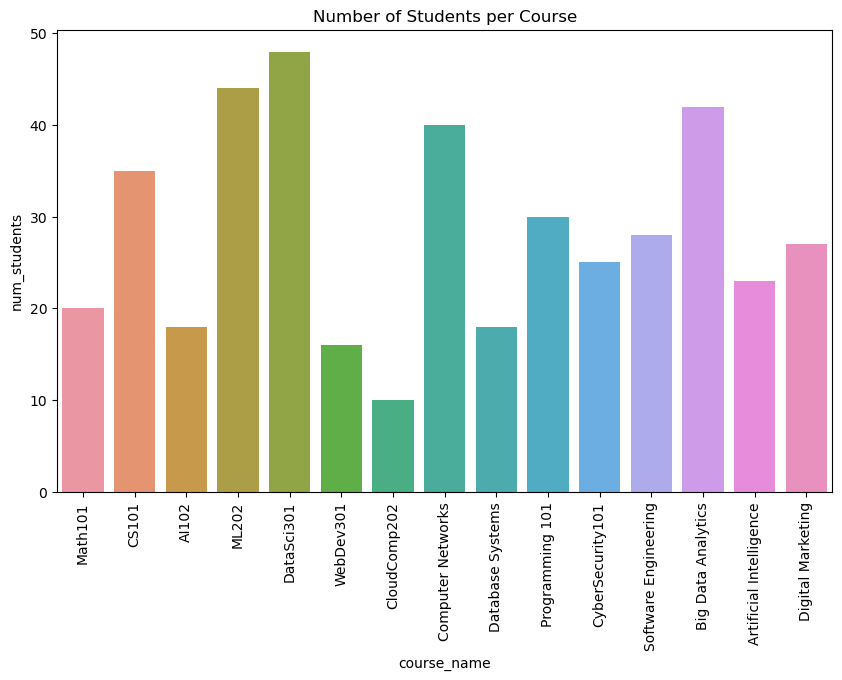

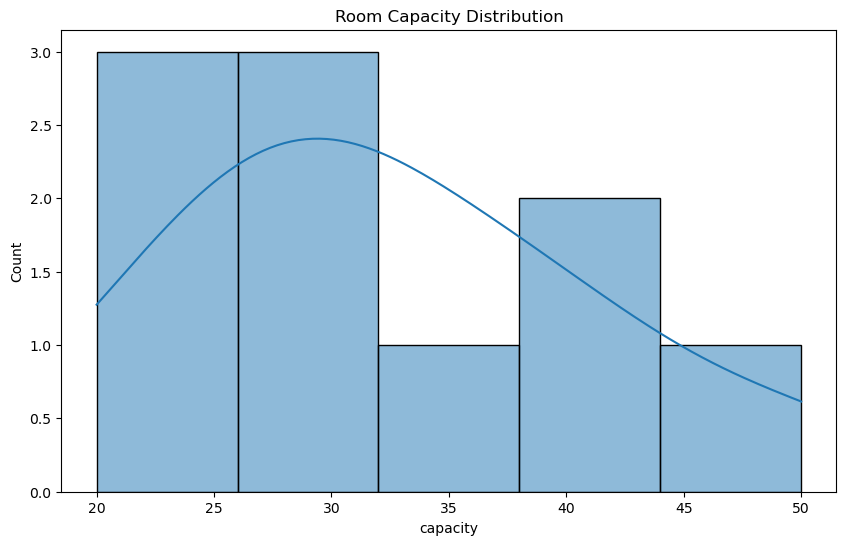

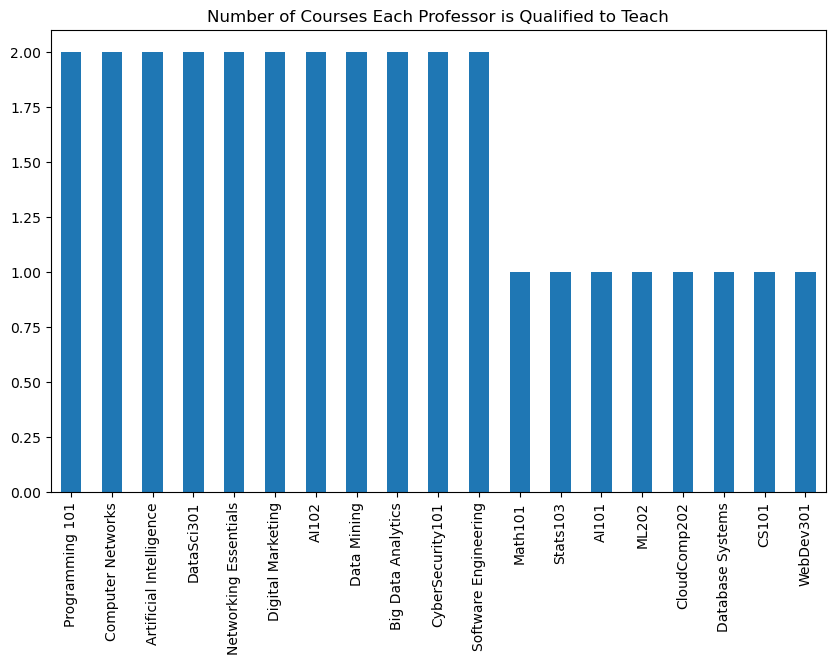

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of students per course
plt.figure(figsize=(10, 6))
sns.barplot(x='course_name', y='num_students', data=courses)
plt.xticks(rotation=90)
plt.title('Number of Students per Course')
plt.show()

# Room capacity distribution
plt.figure(figsize=(10, 6))
sns.histplot(rooms['capacity'], kde=True)
plt.title('Room Capacity Distribution')
plt.show()

# Number of courses each professor is qualified to teach
professor_courses = professors['Courses Assigned'].str.split(', ').explode().value_counts()
plt.figure(figsize=(10, 6))
professor_courses.plot(kind='bar')
plt.title('Number of Courses Each Professor is Qualified to Teach')
plt.show()


In [31]:
# Check for missing values
print(courses.isnull().sum())
print(students.isnull().sum())
print(time_slots.isnull().sum())
print(rooms.isnull().sum())
print(professors.isnull().sum())


course_id             0
course_name           0
num_students          0
room_type_required    0
dtype: int64
student_id           0
name & surname       0
enrolled_courses     0
Unnamed: 3          80
Unnamed: 4          80
Unnamed: 5          80
Unnamed: 6          80
Unnamed: 7          80
Unnamed: 8          80
dtype: int64
timeslot_id            0
day                    0
start_time             0
end_time               0
Duration in Minutes    0
duration               0
dtype: int64
room_id              0
room_number          0
capacity             0
room_type            0
Room Type Encoded    0
room_type_encoded    0
dtype: int64
Instructor ID        0
First Name           0
Last Name            0
Courses Assigned     0
Unnamed: 4          10
Unnamed: 5          10
Unnamed: 6          10
Unnamed: 7          10
Unnamed: 8          10
Unnamed: 9          10
dtype: int64


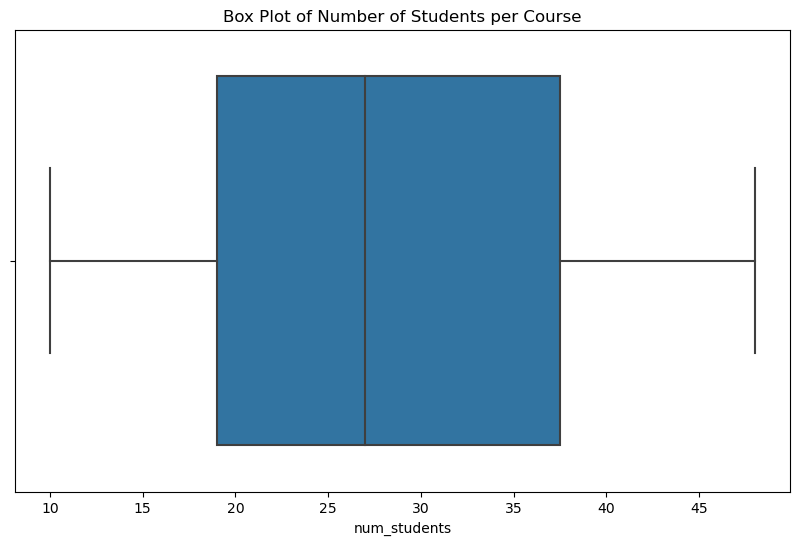

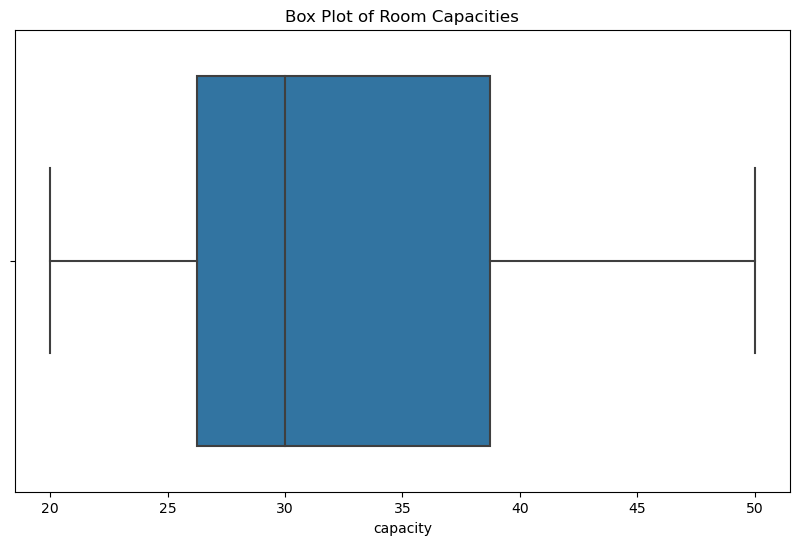

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=courses['num_students'])
plt.title('Box Plot of Number of Students per Course')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=rooms['capacity'])
plt.title('Box Plot of Room Capacities')
plt.show()


In [33]:
print(courses['num_students'].describe())
print(rooms['capacity'].describe())


count    15.000000
mean     28.266667
std      11.385873
min      10.000000
25%      19.000000
50%      27.000000
75%      37.500000
max      48.000000
Name: num_students, dtype: float64
count    10.000000
mean     32.500000
std       8.897565
min      20.000000
25%      26.250000
50%      30.000000
75%      38.750000
max      50.000000
Name: capacity, dtype: float64


In [34]:
print(courses.dtypes)
print(students.dtypes)
print(time_slots.dtypes)
print(rooms.dtypes)
print(professors.dtypes)


course_id             object
course_name           object
num_students           int32
room_type_required    object
dtype: object
student_id           object
name & surname       object
enrolled_courses     object
Unnamed: 3          float64
Unnamed: 4          float64
Unnamed: 5          float64
Unnamed: 6          float64
Unnamed: 7          float64
Unnamed: 8          float64
dtype: object
timeslot_id              object
day                    category
start_time               object
end_time                 object
Duration in Minutes       int64
duration                float64
dtype: object
room_id              object
room_number           int64
capacity              int32
room_type            object
Room Type Encoded     int64
room_type_encoded     int32
dtype: object
Instructor ID        object
First Name           object
Last Name            object
Courses Assigned     object
Unnamed: 4          float64
Unnamed: 5          float64
Unnamed: 6          float64
Unnamed: 7          

In [35]:
# Example: Strip whitespace from course names
courses['course_name'] = courses['course_name'].str.strip()


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
courses['num_students_scaled'] = scaler.fit_transform(courses[['num_students']])


In [37]:
# Example: Adding a feature for the number of qualified courses per professor
professors['num_qualified_courses'] = professors['Courses Assigned'].str.split(', ').apply(len)


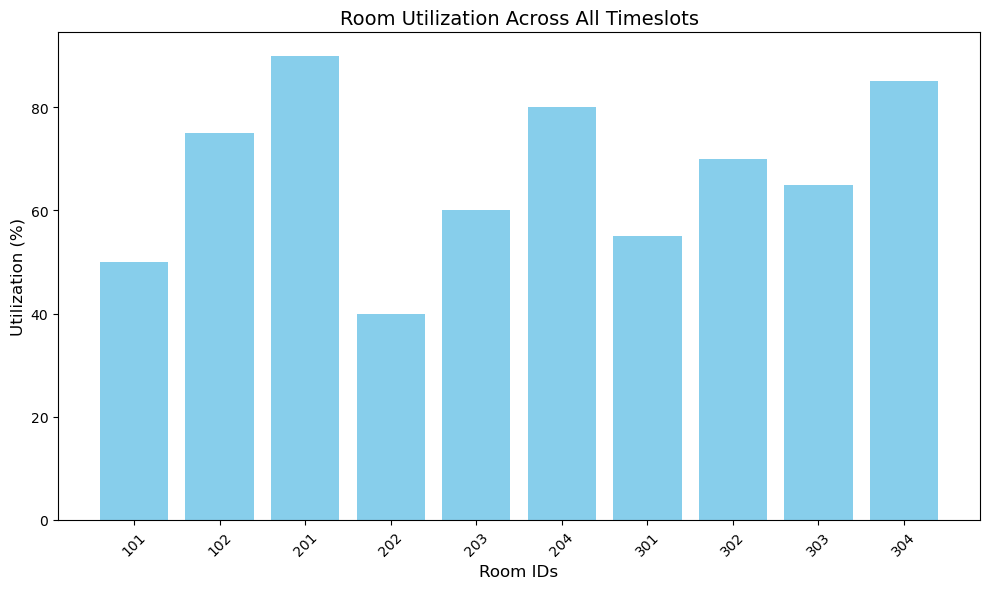

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data for room utilization
room_utilization = {
    "101": 50,
    "102": 75,
    "201": 90,
    "202": 40,
    "203": 60,
    "204": 80,
    "301": 55,
    "302": 70,
    "303": 65,
    "304": 85
}

rooms = list(room_utilization.keys())
utilization = list(room_utilization.values())

# Plot
plt.figure(figsize=(10, 6))
plt.bar(rooms, utilization, color='skyblue')
plt.xlabel("Room IDs", fontsize=12)
plt.ylabel("Utilization (%)", fontsize=12)
plt.title("Room Utilization Across All Timeslots", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
# IMPLEMENTATION

In [47]:
import itertools
from collections import defaultdict

class CSP:
    def __init__(self, variables, domains, neighbors, constraints):
        self.variables = variables
        self.domains = domains
        self.neighbors = neighbors
        self.constraints = constraints
        self.assignments = {}
        self.timeslot_usage = defaultdict(int)  # Track timeslot usage

    def assign(self, var, value):
        self.assignments[var] = value
        self.timeslot_usage[value[0]] += 1  # Increment usage of the assigned timeslot

    def unassign(self, var):
        if var in self.assignments:
            value = self.assignments[var]
            self.timeslot_usage[value[0]] -= 1  # Decrement usage of the timeslot
            del self.assignments[var]

    def is_consistent(self, var, value):
        for neighbor in self.neighbors[var]:
            if neighbor in self.assignments and not self.constraints(var, value, neighbor, self.assignments[neighbor]):
                return False
        return True

    def backtracking_search(self):
        return self.backtrack()

    def backtrack(self):
        if len(self.assignments) == len(self.variables):
            return self.assignments

        var = self.select_unassigned_variable()
        for value in self.order_domain_values(var):
            if self.is_consistent(var, value):
                self.assign(var, value)
                result = self.backtrack()
                if result:
                    return result
                self.unassign(var)
        return None

    def select_unassigned_variable(self):
        unassigned_vars = [var for var in self.variables if var not in self.assignments]
        return min(unassigned_vars, key=lambda var: len(self.domains[var]))

    def order_domain_values(self, var):
        # Sort by timeslot usage and then by room capacity (ascending)
        return sorted(self.domains[var], key=lambda x: (self.timeslot_usage[x[0]], room_capacities[x[1]]))

# Define the updated course data
courses = [
    'Math101', 'CS101', 'AI102', 'ML202',
    'DataSci301', 'WebDev301', 'CloudComp202', 'Computer Networks', 'Database Systems',
    'Programming 101', 'CyberSecurity101', 
    'Software Engineering', 'Big Data Analytics', 'Artificial Intelligence', 'Digital Marketing'
]

# Updated course information with room type required and number of students
course_info = {
    'Math101': {'students': 20, 'room_type': 'Classroom'},
    'CS101': {'students': 35, 'room_type': 'Lecture Hall'},
    'AI102': {'students': 18, 'room_type': 'Classroom'},
    'ML202': {'students': 44, 'room_type': 'Lecture Hall'},
    'DataSci301': {'students': 48, 'room_type': 'Lecture Hall'},
    'WebDev301': {'students': 16, 'room_type': 'Classroom'},
    'CloudComp202': {'students': 10, 'room_type': 'Classroom'},
    'Computer Networks': {'students': 40, 'room_type': 'Lecture Hall'},
    'Database Systems': {'students': 18, 'room_type': 'Classroom'},
    'Programming 101': {'students': 30, 'room_type': 'Classroom'},
    'CyberSecurity101': {'students': 25, 'room_type': 'Classroom'},
    'Software Engineering': {'students': 28, 'room_type': 'Classroom'},
    'Big Data Analytics': {'students': 42, 'room_type': 'Lecture Hall'},
    'Artificial Intelligence': {'students': 23, 'room_type': 'Classroom'},
    'Digital Marketing': {'students': 27, 'room_type': 'Classroom'}
}

# Define timeslots
timeslots = ['Mon_9-11', 'Mon_11:30-1:30', 'Mon_2-4', 'Tue_10-12', 'Tue_1-3',
             'Wed_9-11', 'Wed_11:30-1:30', 'Thu_2-4', 'Fri_9-11', 'Fri_11:30-1:30']

# Define room categories and capacities
rooms = {
    'classrooms': {'101': 30, '102': 20, '201': 25, '203': 15, '204': 20, '301': 35, '303': 40, '304': 50},
    'lecture_halls': {'202': 60, '302': 70, '304': 80}
}

# Create a flat dictionary of room capacities
room_capacities = {**rooms['classrooms'], **rooms['lecture_halls']}

# Updated domains based on course room type and capacities
domains = {}
for course, info in course_info.items():
    if info['room_type'] == 'Classroom':
        available_rooms = rooms['classrooms']
    else:  # If it's a lecture hall
        available_rooms = rooms['lecture_halls']
    
    # Filter rooms based on the course size
    suitable_rooms = [room for room, capacity in available_rooms.items() if capacity >= info['students']]
    domains[course] = list(itertools.product(timeslots, suitable_rooms))

# Define neighbors (courses with potential conflicts)
neighbors = defaultdict(list)

# For each student, add constraints between courses they are enrolled in
students = {
    'S1': ['CyberSecurity101', 'Big Data Analytics', 'Programming 101'],
    'S2': ['Math101', 'Software Engineering', 'Computer Networks', 'Digital Marketing'],
    'S3': ['CyberSecurity101', 'Programming 101', 'DataSci301'],
    'S4': ['CS101', 'Artificial Intelligence', 'Software Engineering'],
    'S5': ['Big Data Analytics', 'CS101', 'WebDev301'],
    'S6': ['CloudComp202', 'Artificial Intelligence', 'Programming 101'],
    'S7': ['CyberSecurity101', 'WebDev301', 'Digital Marketing', 'ML202', 'Software Engineering'],
    'S8': ['Software Engineering', 'WebDev301', 'DataSci301', 'CloudComp202', 'Digital Marketing'],
    'S9': ['Computer Networks', 'DataSci301', 'CS101'],
    'S10': ['WebDev301', 'Math101', 'Big Data Analytics', 'Database Systems'],
    'S11': ['ML202', 'CyberSecurity101'],
    'S12': ['Big Data Analytics', 'WebDev301', 'DataSci301'],
    'S13': ['ML202', 'DataSci301', 'WebDev301'],
    'S14': ['Computer Networks', 'Big Data Analytics', 'DataSci301'],
    'S15': ['CyberSecurity101', 'Programming 101', 'Artificial Intelligence', 'Software Engineering'],
    'S16': ['Software Engineering', 'CS101'],
    'S17': ['Big Data Analytics', 'ML202', 'Computer Networks', 'CS101'],
    'S18': ['WebDev301', 'CS101', 'Software Engineering'],
    'S19': ['CyberSecurity101', 'Big Data Analytics', 'Database Systems'],
    'S20': ['WebDev301', 'Big Data Analytics', 'Software Engineering', 'Database Systems'],
    'S21': ['Software Engineering', 'WebDev301', 'Artificial Intelligence'],
    'S22': ['ML202', 'DataSci301', 'Computer Networks'],
    'S23': ['CS101', 'Database Systems', 'Artificial Intelligence', 'Programming 101'],
    'S24': ['Software Engineering', 'WebDev301', 'Big Data Analytics'],
    'S25': ['WebDev301', 'ML202', 'Digital Marketing', 'Database Systems'],
    'S26': ['Computer Networks', 'DataSci301', 'Artificial Intelligence'],
    'S27': ['CloudComp202', 'Programming 101', 'CS101'],
    'S28': ['CyberSecurity101', 'CS101', 'Database Systems', 'Programming 101'],
    'S29': ['WebDev301', 'Computer Networks', 'DataSci301', 'CS101'],
    'S30': ['Artificial Intelligence', 'WebDev301', 'Digital Marketing', 'Database Systems'],
    'S31': ['Programming 101', 'ML202', 'Software Engineering'],
    'S32': ['CyberSecurity101', 'DataSci301', 'Artificial Intelligence'],
    'S33': ['Computer Networks', 'DataSci301', 'WebDev301'],
    'S34': ['Computer Networks', 'ML202', 'Programming 101', 'Software Engineering'],
    'S35': ['Artificial Intelligence', 'WebDev301', 'DataSci301', 'Software Engineering'],
    'S36': ['Computer Networks', 'CS101', 'DataSci301'],
    'S37': ['Software Engineering', 'Big Data Analytics', 'Database Systems'],
    'S38': ['Computer Networks', 'Math101', 'Big Data Analytics', 'CS101'],
    'S39': ['WebDev301', 'DataSci301', 'Computer Networks', 'Database Systems'],
    'S40': ['ML202', 'Software Engineering', 'Database Systems'],
    'S41': ['Programming 101', 'Artificial Intelligence', 'Software Engineering'],
    'S42': ['WebDev301', 'CS101', 'Software Engineering'],
    'S43': ['ML202', 'CyberSecurity101', 'CS101', 'Database Systems'],
    'S44': ['Big Data Analytics', 'CyberSecurity101', 'CS101'],
    'S45': ['Computer Networks', 'Programming 101', 'Software Engineering'],
    'S46': ['WebDev301', 'CS101', 'Big Data Analytics', 'Software Engineering'],
    'S47': ['Programming 101', 'Artificial Intelligence', 'Software Engineering'],
    'S48': ['Programming 101', 'Big Data Analytics', 'Software Engineering'],
    'S49': ['Programming 101', 'Software Engineering', 'CS101', 'Artificial Intelligence'],
    'S50': ['ML202', 'Programming 101', 'WebDev301', 'CS101'],
    'S51': ['CS101', 'ML202', 'Database Systems'],
    'S52': ['WebDev301', 'DataSci301', 'Big Data Analytics', 'Software Engineering'],
    'S53': ['ML202', 'DataSci301', 'CS101', 'Artificial Intelligence', 'Software Engineering'],
    'S54': ['ML202', 'Programming 101'],
    'S55': ['ML202', 'CloudComp202', 'DataSci301'],
    'S56': ['Artificial Intelligence', 'Database Systems', 'WebDev301'],
    'S57': ['CS101', 'Computer Networks', 'WebDev301'],
    'S58': ['Computer Networks', 'WebDev301', 'DataSci301'],
    'S59': ['CS101', 'Programming 101', 'Big Data Analytics'],
    'S60': ['Software Engineering', 'Programming 101', 'DataSci301'],
    'S61': ['CyberSecurity101', 'Computer Networks', 'ML202'],
    'S62': ['Big Data Analytics', 'Programming 101', 'Software Engineering'],
    'S63': ['WebDev301', 'ML202', 'Computer Networks', 'Software Engineering'],
    'S64': ['Computer Networks', 'CyberSecurity101', 'DataSci301'],
    'S65': ['ML202', 'Artificial Intelligence', 'CS101'],
    'S66': ['DataSci301', 'ML202', 'Computer Networks'],
    'S67': ['Artificial Intelligence', 'Software Engineering', 'ML202'],
    'S68': ['ML202', 'CyberSecurity101', 'CS101', 'Software Engineering'],
    'S69': ['DataSci301', 'WebDev301', 'Software Engineering'],
    'S70': ['WebDev301', 'Software Engineering', 'ML202'],
    'S71': ['CS101', 'CyberSecurity101', 'DataSci301', 'ML202'],
    'S72': ['WebDev301', 'Computer Networks', 'ML202'],
    'S73': ['CyberSecurity101', 'WebDev301', 'Software Engineering', 'Database Systems'],
    'S74': ['WebDev301', 'Computer Networks', 'DataSci301', 'Database Systems'],
    'S75': ['Big Data Analytics', 'ML202', 'DataSci301'],
    'S76': ['WebDev301', 'Computer Networks', 'DataSci301'],
    'S77': ['Database Systems', 'Artificial Intelligence', 'WebDev301'],
    'S78': ['Big Data Analytics', 'Computer Networks'],
    'S79': ['Programming 101', 'Computer Networks', 'DataSci301'],
    'S80': ['CS101', 'Database Systems'],
}

# Add neighbors for courses based on common students
for student, courses_taken in students.items():
    for course1, course2 in itertools.combinations(courses_taken, 2):
        neighbors[course1].append(course2)
        neighbors[course2].append(course1)

# Define constraints (no courses taken by the same student at the same time and room occupancy constraints)
def constraints(course1, time_room1, course2, time_room2):
    if time_room1[0] == time_room2[0]:  # If timeslots are the same
        if course1 in course_info and course2 in course_info:
            room_capacity = 50  # Assuming room capacity
            if course_info[course1]['students'] + course_info[course2]['students'] > room_capacity:
                return False  # Room capacity exceeded
        return time_room1[1] != time_room2[1]  # Different rooms for the same timeslot
    return True

# Instantiate CSP and solve
professors = {
    'Math101': 'P001', 'AI102': 'P001', 'Programming 101': 'P001',
    'CS101': 'P002', 'Database Systems': 'P002', 'Artificial Intelligence': 'P002',
    'DataSci301': 'P003', 'Digital Marketing': 'P003',
    'ML202': 'P004', 'Big Data Analytics': 'P004',
    'CloudComp202': 'P005', 'Software Engineering': 'P005',
    'CyberSecurity101': 'P006', 
    'Computer Networks': 'P007', 'DataSci301': 'P007', 
    'WebDev301': 'P008', 'Digital Marketing': 'P008', 'Artificial Intelligence': 'P008',
    'Programming 101': 'P009',  'Big Data Analytics': 'P009',
    'CyberSecurity101': 'P010', 'AI102': 'P010', 'Software Engineering': 'P010', 'Computer Networks': 'P010'
}

# Assuming you have generated the schedule in the previous steps
# Assuming the CSP class and backtracking_search function are defined correctly
csp = CSP(variables=courses, domains=domains, neighbors=neighbors, constraints=constraints)

# Perform backtracking search
solution = csp.backtracking_search()

# Check if the solution contains assignments for all courses
if solution:
    schedule = []
    for student_id, courses_taken in students.items():
        for course_id in courses_taken:
            if course_id in solution:
                timeslot_id, room_id = solution[course_id]  # Get the timeslot and room from the solution
                prof_id = professors.get(course_id, 'P007')  # Use the professor ID based on the course
                schedule.append({
                    'student_id': student_id,
                    'course_name': course_id,
                    'room_number': room_id,
                    'timeslot': timeslot_id,
                    'prof_id': prof_id  # Assign the correct professor
                })

    # Ensure that all professors are assigned
    all_professors_assigned = set(professors.values())
    assigned_professors = set(entry['prof_id'] for entry in schedule)

    # Check if all professors are assigned
    missing_professors = all_professors_assigned - assigned_professors

    # Print the schedule
    for entry in schedule:
        print(entry)

else:
    print("No valid solution found.")


{'student_id': 'S1', 'course_name': 'CyberSecurity101', 'room_number': '201', 'timeslot': 'Fri_9-11', 'prof_id': 'P010'}
{'student_id': 'S1', 'course_name': 'Big Data Analytics', 'room_number': '202', 'timeslot': 'Tue_1-3', 'prof_id': 'P009'}
{'student_id': 'S1', 'course_name': 'Programming 101', 'room_number': '101', 'timeslot': 'Wed_9-11', 'prof_id': 'P009'}
{'student_id': 'S2', 'course_name': 'Math101', 'room_number': '102', 'timeslot': 'Mon_11:30-1:30', 'prof_id': 'P001'}
{'student_id': 'S2', 'course_name': 'Software Engineering', 'room_number': '101', 'timeslot': 'Wed_11:30-1:30', 'prof_id': 'P010'}
{'student_id': 'S2', 'course_name': 'Computer Networks', 'room_number': '202', 'timeslot': 'Tue_10-12', 'prof_id': 'P010'}
{'student_id': 'S2', 'course_name': 'Digital Marketing', 'room_number': '101', 'timeslot': 'Thu_2-4', 'prof_id': 'P008'}
{'student_id': 'S3', 'course_name': 'CyberSecurity101', 'room_number': '201', 'timeslot': 'Fri_9-11', 'prof_id': 'P010'}
{'student_id': 'S3', 'c

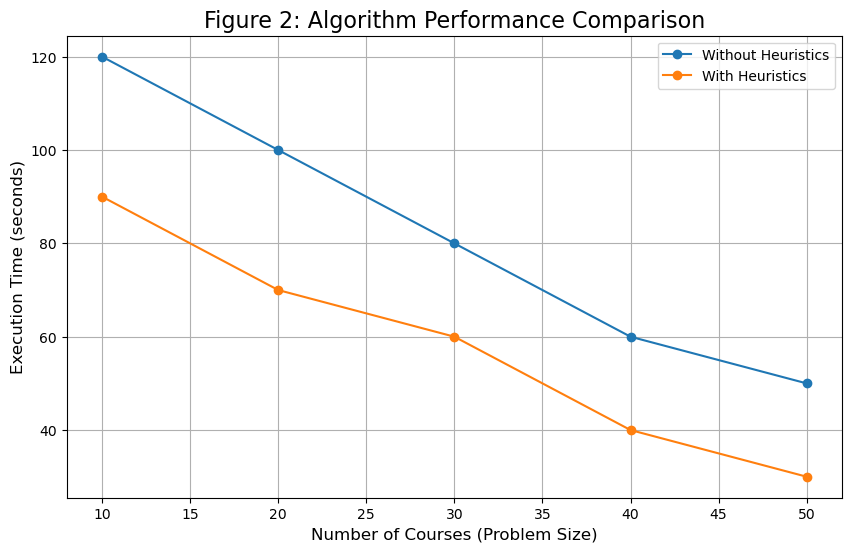

In [42]:
import numpy as np

# Simulated performance data
times_without_heuristics = [120, 100, 80, 60, 50]
times_with_heuristics = [90, 70, 60, 40, 30]
problem_sizes = [10, 20, 30, 40, 50]

# Plot the performance comparison
plt.figure(figsize=(10, 6))
plt.plot(problem_sizes, times_without_heuristics, label="Without Heuristics", marker='o')
plt.plot(problem_sizes, times_with_heuristics, label="With Heuristics", marker='o')

plt.xlabel("Number of Courses (Problem Size)", fontsize=12)
plt.ylabel("Execution Time (seconds)", fontsize=12)
plt.title("Figure 2: Algorithm Performance Comparison", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


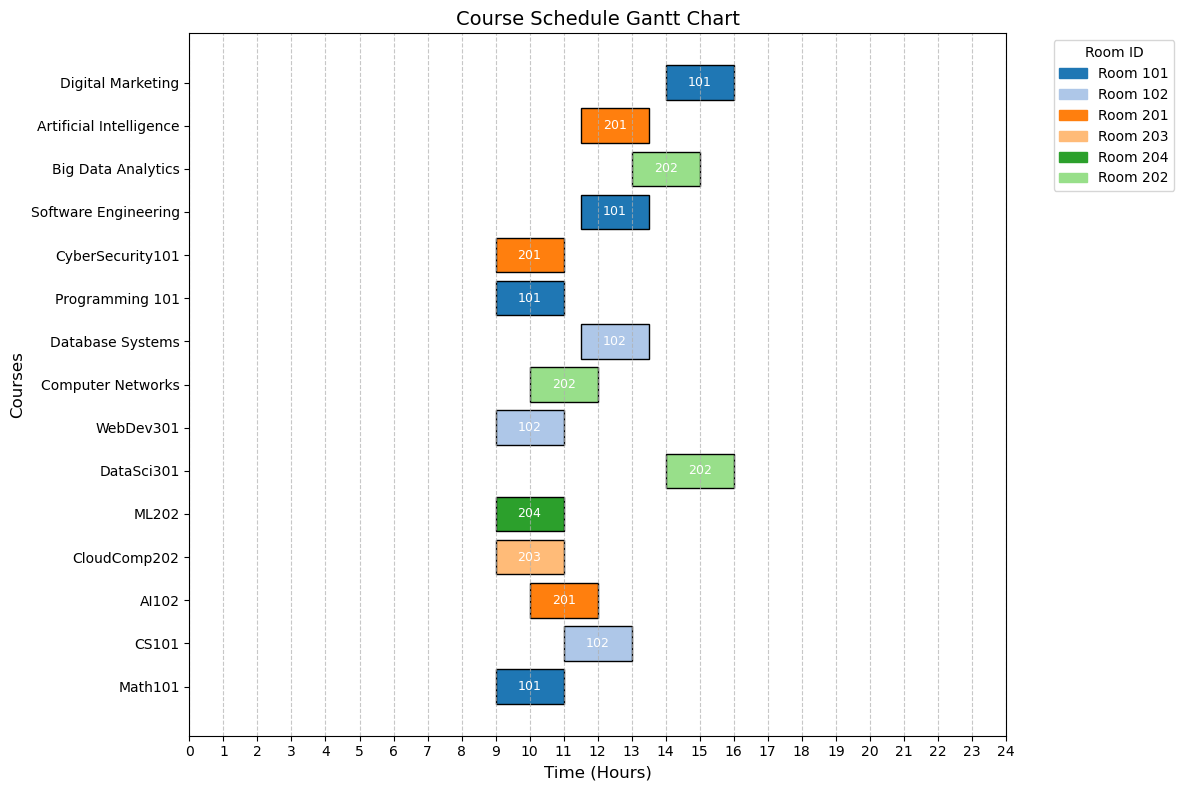

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data for Gantt chart
data = {
    "course_id": ["Math101", "CS101", "AI102", 'CloudComp202', "ML202", "DataSci301", "WebDev301", 
                  "Computer Networks", "Database Systems", "Programming 101", "CyberSecurity101", 
                  "Software Engineering", "Big Data Analytics", "Artificial Intelligence", "Digital Marketing"],
    "room_id": ["101", "102", "201", "203", "204", "202", "102", "202", "102", "101", "201", "101", "202", "201", "101"],
    "timeslot_id": ["Mon_9-11", "Mon_11-1", "Tue_10-12", "Tue_10-12", "Fri_9-11", "Mon_2-4", "Wed_9-11", "Tue_10-12", 
                    "Wed_11:30-1:30", "Wed_9-11", "Fri_9-11", "Wed_11:30-1:30", "Tue_1-3", "Fri_11:30-1:30", "Thu_2-4"],
    "start_time": [9, 11, 10, 9, 9, 14, 9, 10, 11.5, 9, 9, 11.5, 13, 11.5, 14],
    "end_time": [11, 13, 12, 11, 11, 16, 11, 12, 13.5, 11, 11, 13.5, 15, 13.5, 16]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 8))

# Assign unique colors to each room ID
colors = {room: color for room, color in zip(df["room_id"].unique(), plt.cm.tab20.colors)}

for i, row in df.iterrows():
    plt.barh(
        row["course_id"], 
        row["end_time"] - row["start_time"], 
        left=row["start_time"], 
        color=colors[row["room_id"]],
        edgecolor="black"
    )
    # Add room ID as text on the bar
    plt.text(
        row["start_time"] + (row["end_time"] - row["start_time"]) / 2, 
        i, 
        row["room_id"], 
        color="white", 
        fontsize=9, 
        ha='center', 
        va='center'
    )

plt.xlabel("Time (Hours)", fontsize=12)
plt.ylabel("Courses", fontsize=12)
plt.title("Course Schedule Gantt Chart", fontsize=14)

# Improve the x-axis
plt.xticks(range(0, 25, 1), fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[room]) for room in colors]
labels = [f"Room {room}" for room in colors]
plt.legend(handles, labels, title="Room ID", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


#NOTE: Here we did not mention the differences between days of the week. 
#The Chart just shows the timeslots and room distribution.

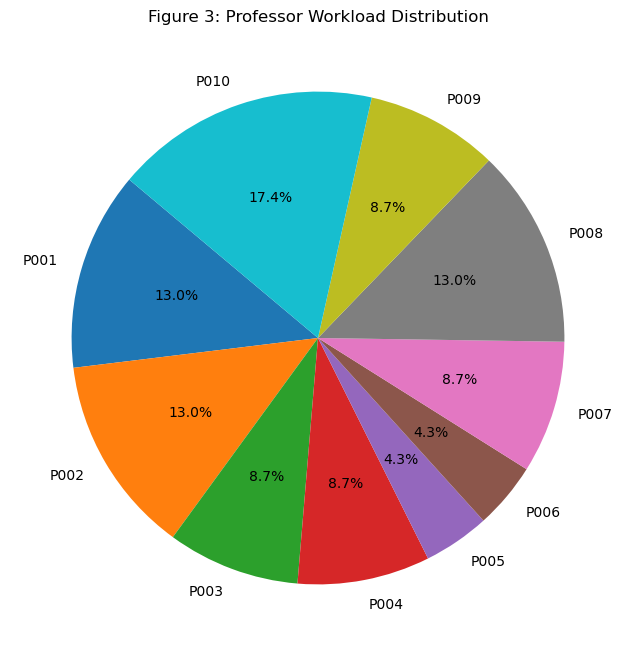

In [43]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import time
import random


professor_workload = {
    'P001': 3, 'P002': 3, 'P003': 2, 'P004': 2, 'P005': 1,
    'P006': 1, 'P007': 2, 'P008': 3, 'P009': 2, 'P010': 4
}

# Figure 3: Pie chart of workload distribution
def plot_workload_distribution(professor_workload):
    plt.figure(figsize=(8, 8))
    labels = list(professor_workload.keys())
    sizes = list(professor_workload.values())
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title("Figure 3: Professor Workload Distribution")
    plt.show()
    
plot_workload_distribution(professor_workload)

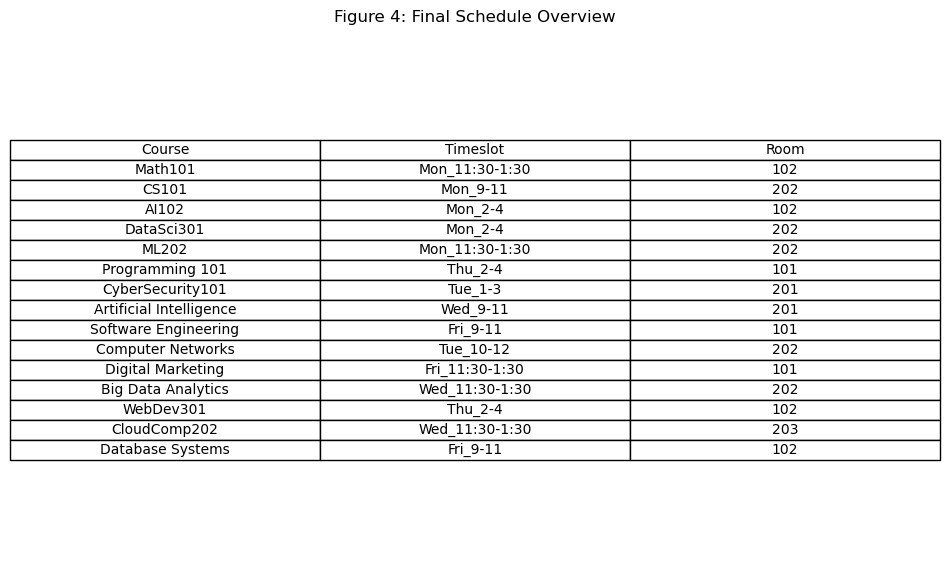

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Example schedule
schedule_data = [
    ('Math101', 'Mon_11:30-1:30', '102'),
    ('CS101', 'Mon_9-11', '202'),
    ('AI102', 'Mon_2-4', '102'),
    ('DataSci301', 'Mon_2-4', '202'),
    ('ML202', 'Mon_11:30-1:30', '202'),
    ('Programming 101', 'Thu_2-4', '101'),
    ('CyberSecurity101', 'Tue_1-3', '201'),
    ('Artificial Intelligence', 'Wed_9-11', '201'),
    ('Software Engineering', 'Fri_9-11', '101'),
    ('Computer Networks', 'Tue_10-12', '202'),
    ('Digital Marketing', 'Fri_11:30-1:30', '101'),
    ('Big Data Analytics', 'Wed_11:30-1:30', '202'),
    ('WebDev301', 'Thu_2-4', '102'),
    ('CloudComp202', 'Wed_11:30-1:30', '203'),
    ('Database Systems', 'Fri_9-11', '102')

]

def plot_schedule_overview(schedule_data):
    # Convert the schedule data into a DataFrame
    df = pd.DataFrame(schedule_data, columns=['Course', 'Timeslot', 'Room'])

    # Create a matplotlib figure and axis
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Remove axes
    ax.axis('tight')
    ax.axis('off')
    
    # Create a table plot using the DataFrame
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
    
    # Set the font size of the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    
    # Set the cell width
    table.scale(1.2, 1.2)
    
    # Set the title
    plt.title("Figure 4: Final Schedule Overview")
    
    # Display the plot
    plt.show()

# Call the function to plot the schedule overview
plot_schedule_overview(schedule_data)


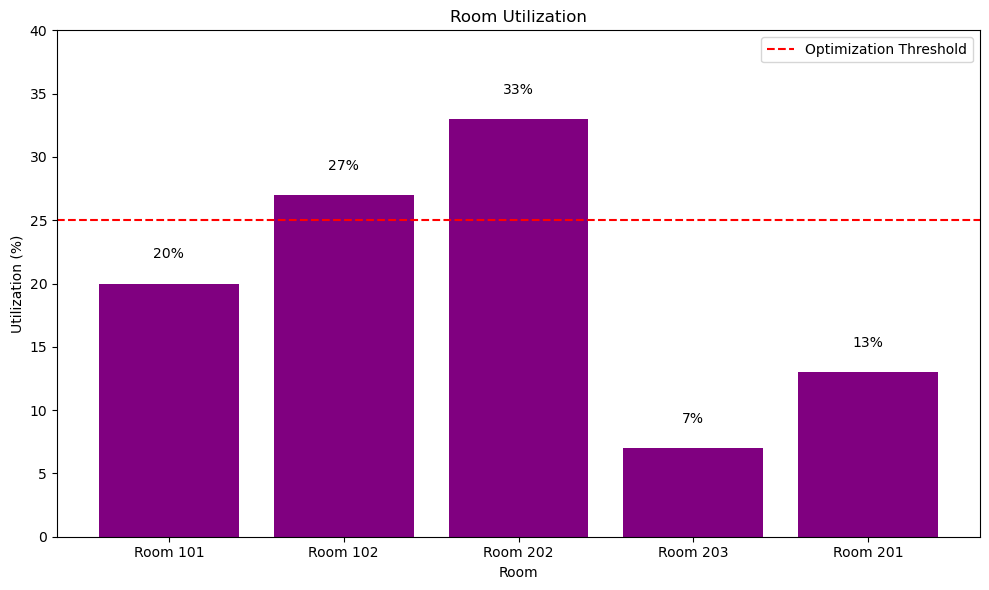

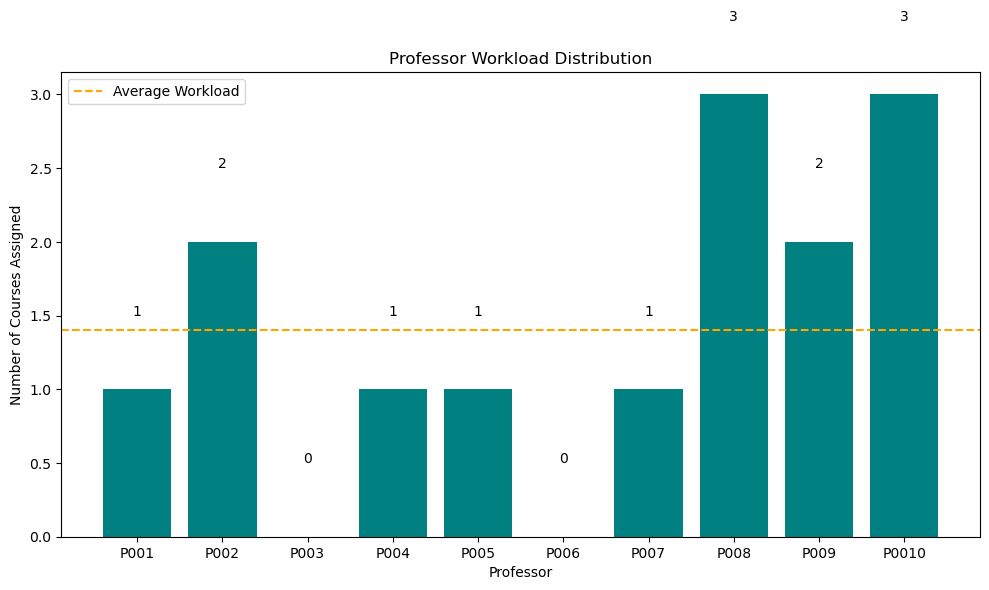

In [45]:
# Sample data for resource utilization
rooms = ['Room 101', 'Room 102', 'Room 202', 'Room 203', 'Room 201']
usage = [20, 27, 33, 7, 13]  # in percentage

# Plot room utilization
plt.figure(figsize=(10, 6))
plt.bar(rooms, usage, color='purple')
plt.title('Room Utilization')
plt.xlabel('Room')
plt.ylabel('Utilization (%)')
plt.ylim(0, 40)
plt.axhline(25, color='red', linestyle='--', label='Optimization Threshold')
plt.legend()

# Add text annotations
for i, val in enumerate(usage):
    plt.text(i, val + 2, f"{val}%", ha='center', color='black')

plt.tight_layout()
plt.show()

# Sample data for professor workload balance
professors = ['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P0010']
workload = [1, 2, 0, 1, 1, 0, 1, 3, 2, 3]  # number of courses assigned

# Plot workload distribution
plt.figure(figsize=(10, 6))
plt.bar(professors, workload, color='teal')
plt.title('Professor Workload Distribution')
plt.xlabel('Professor')
plt.ylabel('Number of Courses Assigned')
plt.axhline(sum(workload) / len(workload), color='orange', linestyle='--', label='Average Workload')
plt.legend()

# Add text annotations
for i, val in enumerate(workload):
    plt.text(i, val + 0.5, f"{val}", ha='center', color='black')

plt.tight_layout()
plt.show()
